# PATH COVERING ALGORITHM

In [130]:
# required for display purpose only , comment when not using 
%matplotlib nbagg

# lib required for functioning.
import numpy as np
from scipy.interpolate import splprep, splev
from shapely.geometry import Polygon, Point
import pandas as pd


#lib required for visualization only
import matplotlib.pyplot as plt



In [131]:
class gloabl_path_coverage:
    
    def __init__(self,fileName,lgt_upper_lim,lat_upper_lim,data_sep=" "):
        self.gps_file_name = fileName
        self.longitude_upper_limit = lgt_upper_lim
        self.latitude_upper_limit = lat_upper_lim
        self.


#re-configurable parameters
gps_file_name = 'obs'
longitude_upper_limit = 1
latitude_upper_limit = 1
data_separator = " "


#check if all required parameters have values , in case of no values return error.

### LOAD DATA

In [132]:
df = pd.read_csv(file_name, sep=" ", header=None)
#lsit of points in format [Latitude,Longitude] 
coordinates  = df.apply(pd.to_numeric, args=('coerce',)).values

#contains points for farm boundary and each obstacle recorded 
list_of_boundaries = []

#temp for calculation purpose
boundary = []

# loop to separate points based on boundary from file read (coordinates) and store it into list of boundaries
for i in coordinates:
    if np.isnan(i).any():
        list_of_boundaries.append(boundary)
        boundary = []
        continue
    boundary.append(i)


In [134]:
# will convert points under list_of_boundaries into indiv polygon and store into list_all_polygons.

## its one time process

list_all_polygons =[]

for boundary in list_of_boundaries:
    points =np.array(boundary)
    list_all_polygons.append(Polygon(points))
    
print"Number of Zones: ",len(list_all_polygons)

Number of Zones:  2


#### Plot the Zones

<IPython.core.display.Javascript object>


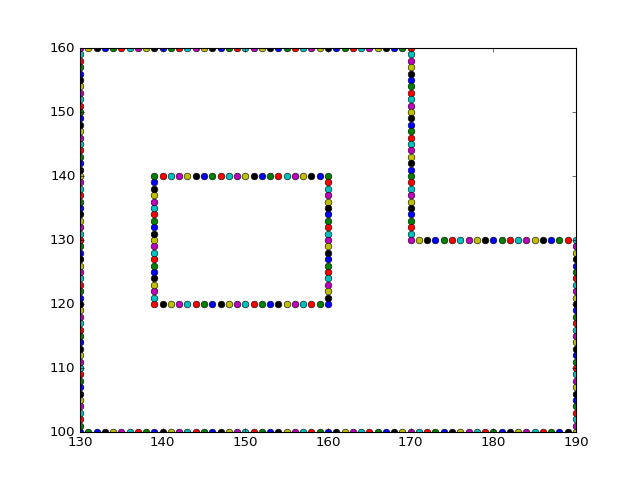

In [125]:
## just for display purpose

for boundary in list_of_boundaries:
    for points in boundary:
        plt.plot(points[0],points[1],'o')
plt.show()
    

In [126]:
# all boundary point creation from set of points

minx, miny, maxx, maxy = list_all_polygons[0].bounds
longs = np.arange(minx, maxx+longitude_upper_limit)
lats =  np.arange(miny, maxy+latitude_upper_limit)
edges=[]
for x in range(0,len(longs)):
    for y in range(0,len(lats)):
        point = Point([longs[x],lats[y]])
        if list_all_polygons[0].contains(point) or np.any(np.equal([longs[x],lats[y]] , list_of_boundaries[0]).all(axis=1)):
            for obstacle_poly in list_all_polygons[1:]:
                if not obstacle_poly.contains(point):
                    edges.append([longs[x],lats[y]])
print "Number of lawn boundary points: ",len(edges)
#2741

Number of lawn boundary points:  2741


In [127]:
current_position = edges[0]
traversed_list = []

move=[[0,-1],[-1,0],[0,1],[1,0]]
def move_next(current_position):
#     print(current_position)
    for i in move:
        next_x = current_position[0] + i[0]
        next_y = current_position[1] + i[1]
        point = Point(next_x , next_y)
        if [next_x , next_y] not in traversed_list:
            if list_all_polygons[0].contains(point) or np.any(np.equal([next_x , next_y] , coordinates).all(axis=1)):
                if( len(list_all_polygons) > 1):
                    for obstacle_poly in list_all_polygons[1:]:
                        if not obstacle_poly.contains(point):
                            return [next_x,next_y]
                else:
                    return [next_x,next_y]
    return None
        
while len(edges)!=0 :
    
    if current_position == None:
        current_position = edges[0]
    edges.remove(current_position)
    traversed_list.append(current_position)
    current_position = move_next(current_position)
print(len(traversed_list))

2741


## Plot the Waypoints

<IPython.core.display.Javascript object>


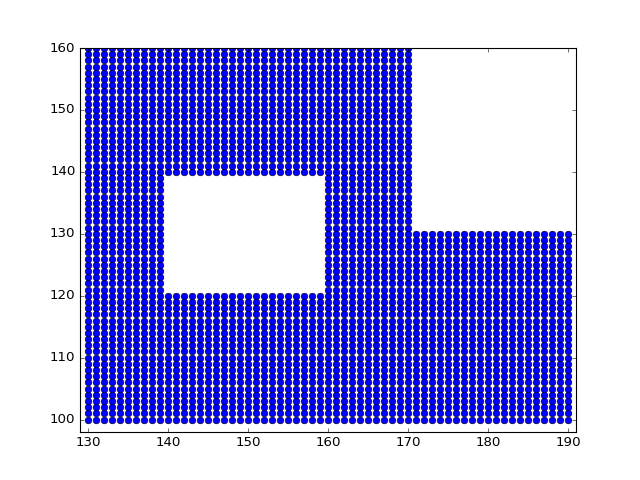

In [129]:
from matplotlib.animation import FuncAnimation

wp_arr = np.array(traversed_list)
x_coo = wp_arr[:,0].tolist()
y_coo = wp_arr[:,1].tolist()
frame = len(traversed_list)+1
fig = plt.figure()
plt.xlim(129,191)
plt.ylim(98,160)
graph, = plt.plot([],[],'o')
def animate(i):
    graph.set_data(x_coo[:i],y_coo[:i])
    return graph

animation= FuncAnimation(fig,animate,frames=frame,interval=10,repeat=False)
plt.show()